This project demonstrates handwritten digit classification (0–9) using the K-Nearest Neighbors (KNN) algorithm on the sklearn digits dataset.The goal is to understand how distance-based classification works and how tuning the value of K affects model performance.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


We load the handwritten digits dataset from sklearn.  
This dataset contains 1797 images of digits (0–9), each of size 8x8 pixels.


In [3]:
digits = load_digits()

X = digits.data
y = digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


We display a few digit images to understand how the data looks and verify their labels.


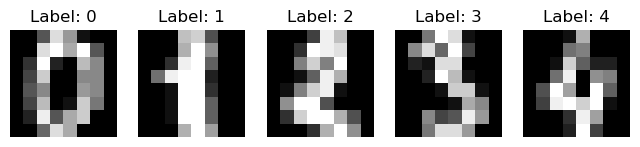

In [4]:
plt.figure(figsize=(8,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()



We split the dataset into 80% training data and 20% testing data.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (1437, 64)
Testing samples: (360, 64)


KNN is a distance-based algorithm.  
If features are not scaled, larger values can dominate the distance calculation.
Hence, we use StandardScaler to normalize the data.


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train KNN Model with K = 3


In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", acc)


Accuracy with K=3: 0.9694444444444444


We test K values: 3, 5, 7, 9 and store their accuracies.


In [8]:
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Accuracy for K={k}: {acc}")


Accuracy for K=3: 0.9694444444444444
Accuracy for K=5: 0.975
Accuracy for K=7: 0.9722222222222222
Accuracy for K=9: 0.9722222222222222



This helps us choose the best value of K.


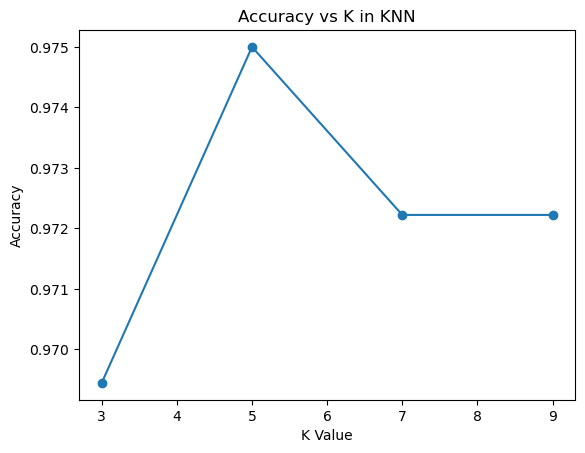

In [9]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.show()
